# Phase 3 Project

Data can be found at: https://www.kaggle.com/itsmesunil/bank-loan-modelling

The data found for this project was collected by 'Universal Bank'.  They wanted to determine who was the most likely to accept the offer for a personal loan.  

The business problem is to expand the number of 'asset customers' the bank has.  This means customers who are paying interst to the bank and there for increasing the bank's overall networth.  The idea is to create a machine learning model that will accurately predict the liklihood someone will accept a personal loan. Using this informatino the bank can selectively market their personal loan program and expand their number of 'asset customers'.

## Data Description:


|Columns|Descriptions|Type|
|:------|:-----------:|:----|
|ID|Customer ID|Continuous|
|Age|Customer's age in completed years|Continuous|
|Experience|years of professional experience|Continuous|
|Income|Annual income of the customer (thousands)|Continuous|
|ZIPCode|Home Address ZIP code.|Categorical|
|Family|Family size of the customer|Categorical|
|CCAvg|Avg. spending on credit cards per month (thousands)|Continuous|
|Education|Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional|Categorical|
|Mortgage|Value of house mortgage if any. (thousands)|Continuous|
|Personal Loan|Did this customer accept the personal loan offered in the last campaign?|0 = No 1= Yes|
|Securities Account|Does the customer have a securities account with the bank?|0 = No 1= Yes|
|CD Account|Does the customer have a certificate of deposit (CD) account with the bank?|0 = No 1= Yes|
|Online|Does the customer use internet banking facilities?|0 = No 1= Yes|
|CreditCard|Does the customer use a credit card issued by UniversalBank?|0 = No 1= Yes|

 Import the data.

In [119]:
import pandas as pd
import seaborn as sns
import numpy as np
import math
import matplotlib.pyplot as plt

In [120]:
df = pd.read_csv('Bank_Personal_Loan_Modelling.csv')

First looking at the head of this data and the description of basics like quartiles, mean, and standard deviation, we see that it is a really clean data set.  There are no missing values.  The minimum and maximum do not stray from the interquartile range too dramatically.  We have 5000 entries which is decent.  For machine learning it would be preferable for us to have more than this for the model to learn from.  The cleanliness of this data set lends itself well, however.

In [121]:
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [122]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [123]:
df.shape

(5000, 14)

In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


Taking a look below at the histograms for each column or 'feature', it can be observed that our continuous variables include Age, Experience, Income, CCAvg, and Mortgage.  Both CCAvg and Mortgage indicate two things:

* The first is many of the rows are ticked with 0. All of those rows indicate people who do not have a Credit Card or Mortgage, respectively.  

* The second is the remaining values representing the amount of average credit card expenditure per month and mortgage amount in thousands, respectively.

These seperate issues will be handled in the data cleaning.

The categorical variables include Family and Education.

Finally we have a seies of categorical variables that were yes or no questions represented by 1s and 0s.  These include Securities Account, CD Account, Online, and Credit Card.

The final column, Personal Loan, will act as our 'y' variable.  The variable we are trying to predict in the future.
The important thing to remember about this data set and this project is that Personal loan does NOT measure whether or not someone was approved for a Personal Loan or not.  The subjects in this study have already been approved for a Personal Loan and it was recorded if they accepted or not.  We are trying to measure the likeliehood that someone will accept the loan offer from this bank.

ID and Zipcode will both be dropped.  All of the data essentially comes from the same zipcode so geographic information is irrelavent.  If we want to expand the market nationally or internationally then geographic features may become important.

array([[<AxesSubplot:title={'center':'ID'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Experience'}>,
        <AxesSubplot:title={'center':'Income'}>],
       [<AxesSubplot:title={'center':'ZIP Code'}>,
        <AxesSubplot:title={'center':'Family'}>,
        <AxesSubplot:title={'center':'CCAvg'}>,
        <AxesSubplot:title={'center':'Education'}>],
       [<AxesSubplot:title={'center':'Mortgage'}>,
        <AxesSubplot:title={'center':'Personal Loan'}>,
        <AxesSubplot:title={'center':'Securities Account'}>,
        <AxesSubplot:title={'center':'CD Account'}>],
       [<AxesSubplot:title={'center':'Online'}>,
        <AxesSubplot:title={'center':'CreditCard'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

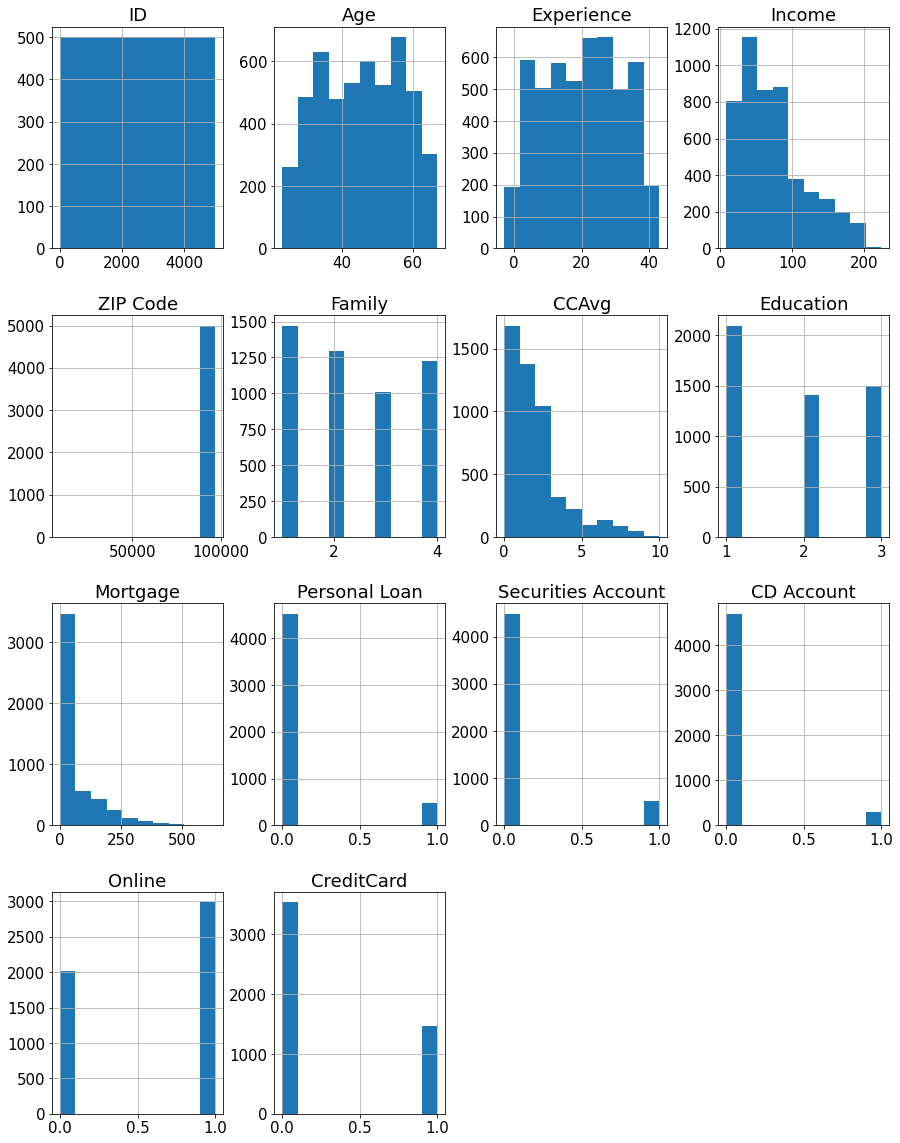

In [125]:
df.hist(figsize = (15, 20))

## Cleaning the Data:

This dataset was relatively easy to work with.  It was very complete and did not have any strange data types or objects.

In [126]:
# Dropped Zip code and ID as they were irrelevant.  
#Underscores were used to replace spaces in column names to save a headache.

In [127]:
df = df.drop(columns = ['ZIP Code', 'ID'])

In [128]:
df.columns = df.columns.str.replace(' ', '_')

In [129]:
df

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,1,1.9,3,0,0,0,0,1,0
4996,30,4,15,4,0.4,1,85,0,0,0,1,0
4997,63,39,24,2,0.3,3,0,0,0,0,0,0
4998,65,40,49,3,0.5,2,0,0,0,0,1,0


Mortgage and credit card average need to be split by T/F and continuous data.
Create two new columns:
* The first is replacing any numerical value not 0 with 1.
* The second is using what numerical value there is to create a continuous set of data for Mortage amount and average monthly CC spending

In [131]:
### First I created a new column that is categorical determining if said person is a mortgage holder or not.
#This was done with a lambda function followed by multiplying everytning by 1 to convert the column from booleans to 0 and 1.

In [132]:
df['Mrtg_holder'] = df['Mortgage'].map(lambda x: True if (x != 0) else False)*1

In [133]:
df

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,Mrtg_holder
0,25,1,49,4,1.6,1,0,0,1,0,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,1,1.9,3,0,0,0,0,1,0,0
4996,30,4,15,4,0.4,1,85,0,0,0,1,0,1
4997,63,39,24,2,0.3,3,0,0,0,0,0,0,0
4998,65,40,49,3,0.5,2,0,0,0,0,1,0,0


In [134]:
### Next is changing all of the 0 values in the Mortgage column to actual values that could be used in the data set.
# We only lost 5 values during the process which is great.

In [135]:
# 0 values were converted to NaN values and then interpolated according to thier index.

In [136]:
df['Mortgage'] = df['Mortgage'].replace(0, np.nan)

In [137]:
df = df.interpolate(method = 'values')

In [138]:
### Let's do it again with CCAvg

In [139]:
df['CCAvg'] = df['CCAvg'].replace(0, np.nan)

In [140]:
df = df.interpolate(method = 'values')

In [141]:
df

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,Mrtg_holder
0,25,1,49,4,1.6,1,NaN,0,1,0,0,0,0
1,45,19,34,3,1.5,1,NaN,0,1,0,0,0,0
2,39,15,11,1,1.0,1,NaN,0,0,0,0,0,0
3,35,9,100,1,2.7,2,NaN,0,0,0,0,0,0
4,35,8,45,4,1.0,2,NaN,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,1,1.9,3,88.0,0,0,0,1,0,0
4996,30,4,15,4,0.4,1,85.0,0,0,0,1,0,1
4997,63,39,24,2,0.3,3,85.0,0,0,0,0,0,0
4998,65,40,49,3,0.5,2,85.0,0,0,0,1,0,0


In [142]:
# Dropping remaining null values.

In [143]:
df.isnull().sum()

Age                   0
Experience            0
Income                0
Family                0
CCAvg                 0
Education             0
Mortgage              5
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
Mrtg_holder           0
dtype: int64

In [144]:
df = df.dropna()

In [145]:
df

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,Mrtg_holder
5,37,13,29,4,0.4,2,155.00,0,0,0,1,0,1
6,53,27,72,2,1.5,2,138.00,0,0,0,1,0,0
7,50,24,22,1,0.3,3,121.00,0,0,0,0,1,0
8,35,10,81,3,0.6,2,104.00,0,0,0,1,0,1
9,34,9,180,1,8.9,3,107.75,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,1,1.9,3,88.00,0,0,0,1,0,0
4996,30,4,15,4,0.4,1,85.00,0,0,0,1,0,1
4997,63,39,24,2,0.3,3,85.00,0,0,0,0,0,0
4998,65,40,49,3,0.5,2,85.00,0,0,0,1,0,0


### Removing Outliers

Both the z score and intequantile methods were far too aggressive.  Both methods cut the data in half.
Removing outliers also killed the Personal_Loan column which is essential to this project.  
This was a very clean data set so it is possible they were already removed.
However there is the problem of the skew...

In [146]:
df.describe()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,Mrtg_holder
count,4995.000000,4995.000000,4995.000000,4995.000000,4995.000000,4995.000000,4995.000000,4995.000000,4995.000000,4995.000000,4995.000000,4995.000000,4995.000000
mean,45.347948,20.114314,73.800200,2.396196,1.979247,1.881481,184.354555,0.096096,0.104104,0.060460,0.597397,0.294094,0.307908
std,11.463068,11.467910,46.040123,1.147417,1.732354,0.840008,88.581788,0.294752,0.305426,0.238362,0.490471,0.455680,0.461674
min,23.000000,-3.000000,8.000000,1.000000,0.100000,1.000000,75.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35.000000,10.000000,39.000000,1.000000,0.700000,1.000000,120.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,45.000000,20.000000,64.000000,2.000000,1.600000,2.000000,160.400000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,55.000000,30.000000,98.000000,3.000000,2.600000,3.000000,223.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,67.000000,43.000000,224.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Experience'}>,
        <AxesSubplot:title={'center':'Income'}>,
        <AxesSubplot:title={'center':'Family'}>],
       [<AxesSubplot:title={'center':'CCAvg'}>,
        <AxesSubplot:title={'center':'Education'}>,
        <AxesSubplot:title={'center':'Mortgage'}>,
        <AxesSubplot:title={'center':'Personal_Loan'}>],
       [<AxesSubplot:title={'center':'Securities_Account'}>,
        <AxesSubplot:title={'center':'CD_Account'}>,
        <AxesSubplot:title={'center':'Online'}>,
        <AxesSubplot:title={'center':'CreditCard'}>],
       [<AxesSubplot:title={'center':'Mrtg_holder'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

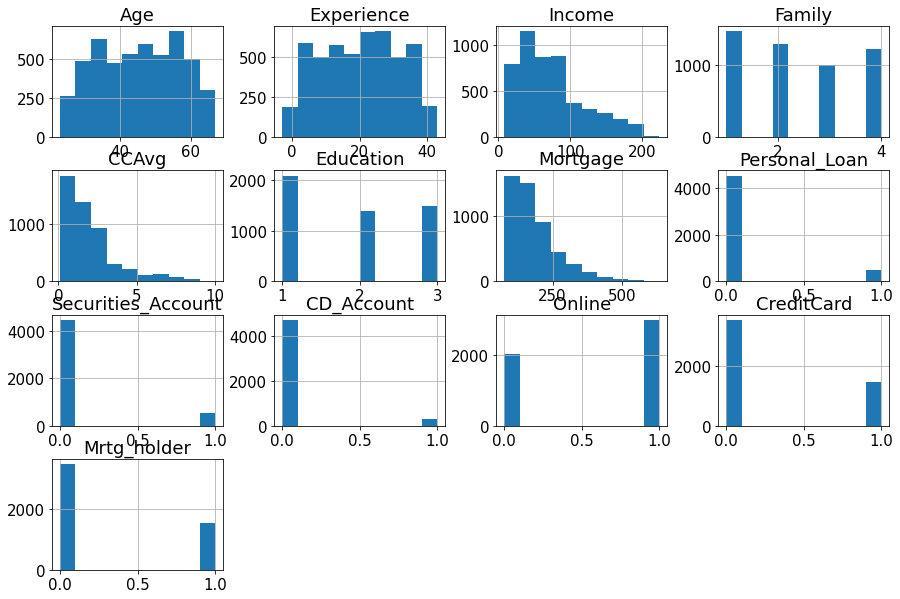

In [147]:
df.hist(figsize = (15,10))

In [148]:
# Custom Removal of Outliers

The final method that was chosen was to select individual columns, or features, and decide on a reasonable range in which to keep them.  For example on mortgage, although it is heavily skewed to the right, the data is more complete that removing outliers and will not affect our model in a positive or negative way.

In [149]:
df = df[df['CCAvg'] < 8.5]

<AxesSubplot:>

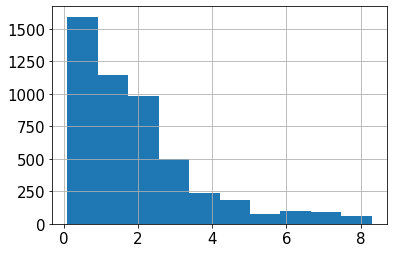

In [150]:
df['CCAvg'].hist()

In [151]:
df = df[df['Mortgage'] < 500]

<AxesSubplot:>

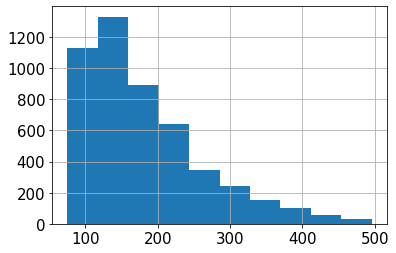

In [152]:
df['Mortgage'].hist()

In [153]:
df = df.astype(float)

In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4926 entries, 5 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 4926 non-null   float64
 1   Experience          4926 non-null   float64
 2   Income              4926 non-null   float64
 3   Family              4926 non-null   float64
 4   CCAvg               4926 non-null   float64
 5   Education           4926 non-null   float64
 6   Mortgage            4926 non-null   float64
 7   Personal_Loan       4926 non-null   float64
 8   Securities_Account  4926 non-null   float64
 9   CD_Account          4926 non-null   float64
 10  Online              4926 non-null   float64
 11  CreditCard          4926 non-null   float64
 12  Mrtg_holder         4926 non-null   float64
dtypes: float64(13)
memory usage: 538.8 KB


## EDA:

Exploratory Data Analysis

In this exploratory data analysis I try to explore the obvious relationships.  We assume that the higher someone's income is the higher their mortgage will be.  Digging deeper we assume that more years of experience the higher their income will be.  Finally the more augmented all these factors are, the safer it is to assume that there is a higher monthly credit card bill as well.  We rely on the assumption that all of these factors have specific linear relationships with one another.  

What we want to explore however, is how ALL of these variables affect our final model.

In [155]:
## Taking a closer look at the likelihood behind each column to be approved for a loan.

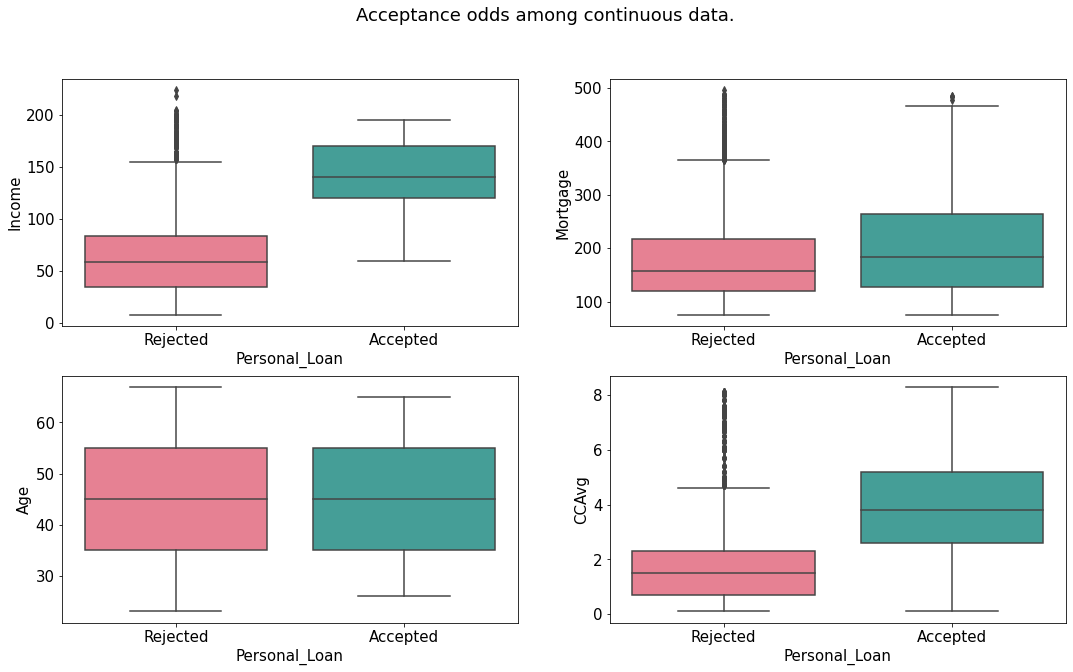

In [156]:
fig, axes = plt.subplots(2, 2, figsize=(18, 10))

fig.suptitle("Acceptance odds among continuous data. ", )

sns.boxplot(ax=axes[0, 0], data=df, x='Personal_Loan', y='Income', palette = 'husl')
sns.boxplot(ax=axes[0, 1], data=df, x='Personal_Loan', y='Mortgage', palette = 'husl')
sns.boxplot(ax=axes[1, 0], data=df, x='Personal_Loan', y='Age', palette = 'husl')
sns.boxplot(ax=axes[1, 1], data=df, x='Personal_Loan', y='CCAvg', palette = 'husl')

plt.setp(axes, xticks=[0.0, 1.0], xticklabels=['Rejected', 'Accepted'])
plt.rcParams.update({'font.size': 15})

plt.show()

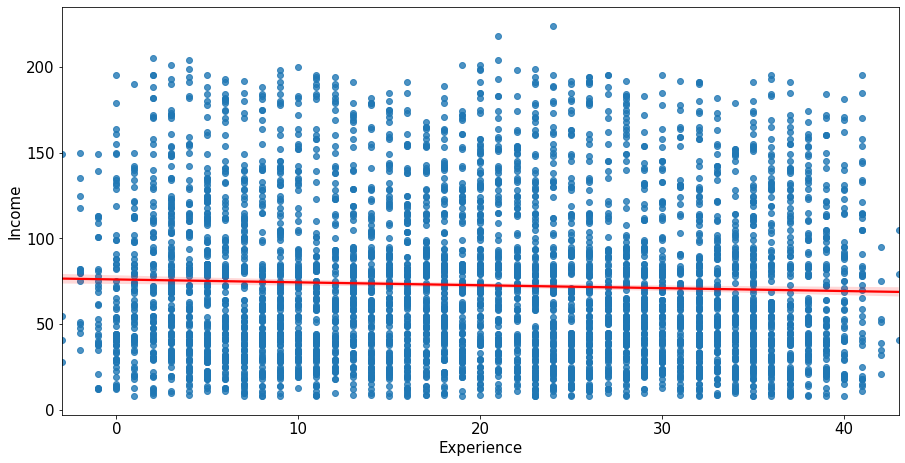

Slope and Intersect: 
 ------------------------
-0.16879097811565705 76.07715168260646


In [157]:
fig_dims = (15, 7.5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.regplot(x="Experience", y="Income",ax= ax, data=df,
           line_kws={"color": "red"})
plt.show()

x = df.Experience
y = df.Income
m, b = np.polyfit(x, y, 1)
print('Slope and Intersect: \n ------------------------')
print(m, b)

In [158]:
import plotly.express as px
fig = px.scatter(df, x= 'Income', y='CCAvg')
fig.show()

In [159]:
fig2 = px.scatter(df, x = 'Income', y = 'Mortgage')
fig2.show()

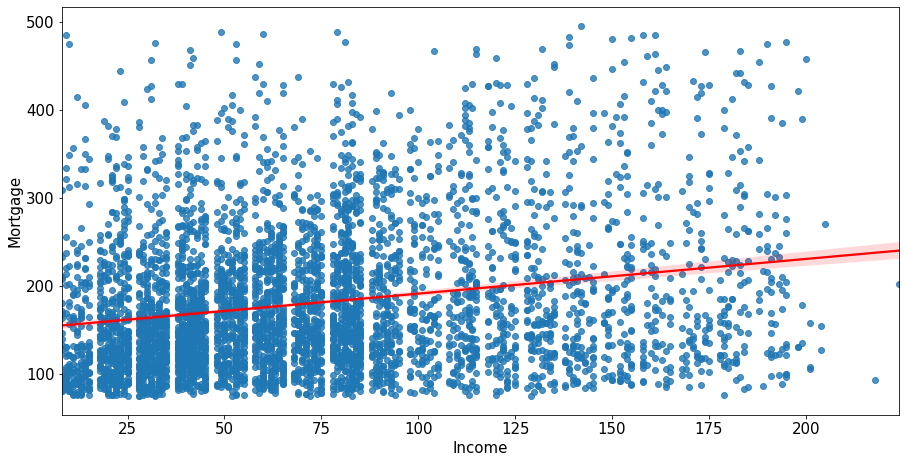

In [160]:
fig_dims = (15, 7.5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.regplot(x="Income", y="Mortgage",ax= ax, data=df,
           line_kws={"color": "red"})
plt.show()

In [161]:
fig3 = px.scatter(df, x = 'Income', y = 'Age')
fig3.show()

<AxesSubplot:xlabel='Education', ylabel='CCAvg'>

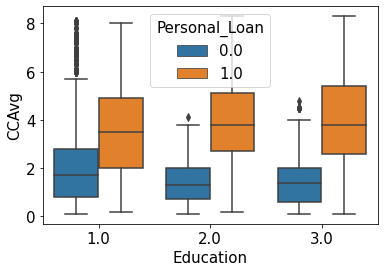

In [162]:
sns.boxplot(x = 'Education', y = 'CCAvg', data = df, hue = 'Personal_Loan')

<AxesSubplot:xlabel='Family', ylabel='CCAvg'>

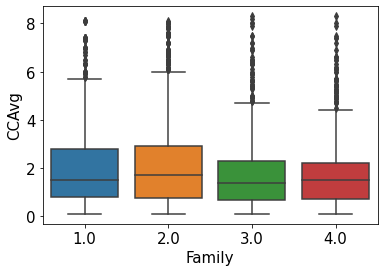

In [163]:
sns.boxplot(x = 'Family', y = 'CCAvg', data = df)

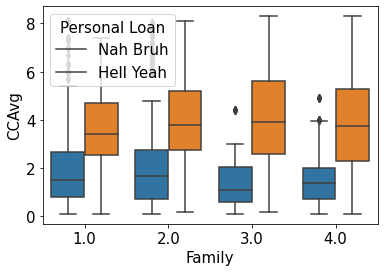

In [164]:
sns.boxplot(x = 'Family', y = 'CCAvg', data = df, hue = 'Personal_Loan')
plt.legend(title='Personal Loan', loc='upper left', labels=['Nah Bruh', 'Hell Yeah'])

## Building Models:

#### One Hot Encoding

Dummy variables: <br>
Dummy variables are useful because they enable us to use a single regression equation to represent multiple groups. This means that we don't need to write out separate equation models for each subgroup. The dummy variables act like 'switches' that turn various parameters on and off in an equation.

In [165]:
pd.get_dummies(df, columns = ['Family', 'Education'], drop_first = True)

,Age,Experience,Income,CCAvg,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,Mrtg_holder,Family_2.0,Family_3.0,Family_4.0,Education_2.0,Education_3.0
5,37.0,13.0,29.0,0.4,155.0,0.0,0.0,0.0,1.0,0.0,1.0,0,0,1,1,0
6,53.0,27.0,72.0,1.5,138.0,0.0,0.0,0.0,1.0,0.0,0.0,1,0,0,1,0
7,50.0,24.0,22.0,0.3,121.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0,0,0,1
8,35.0,10.0,81.0,0.6,104.0,0.0,0.0,0.0,1.0,0.0,1.0,0,1,0,1,0
10,65.0,39.0,105.0,2.4,111.5,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29.0,3.0,40.0,1.9,88.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0,0,0,1
4996,30.0,4.0,15.0,0.4,85.0,0.0,0.0,0.0,1.0,0.0,1.0,0,0,1,0,0
4997,63.0,39.0,24.0,0.3,85.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,1
4998,65.0,40.0,49.0,0.5,85.0,0.0,0.0,0.0,1.0,0.0,0.0,0,1,0,1,0


#### Creating Variables:

As was mentioned earlier, the Personal Loan column will be the column we are trying to predict and all other columns will be features used to predict the outcome.

In [166]:
X = df.drop('Personal_Loan', axis = 1)
y = df['Personal_Loan']

In [167]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

#### Using Scalar Function:

The following was found on the website stackabuse.com :

Since the range of values of raw data varies widely, in some machine learning algorithms, objective functions will not work properly without normalization. For example, the majority of classifiers calculate the distance between two points by the Euclidean distance. If one of the features has a broad range of values, the distance will be governed by this particular feature. Therefore, the range of all features should be normalized so that each feature contributes approximately proportionately to the final distance.

Essentially, Since we have a considerable amount of data with each column varying in range, therefor this feature will mormalize the data so that there is no uneven distribution of contribution to the overall model.

In [168]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### Logistic Regression:

Unlike Linear Regression Logistic Regression accounts for Categorical variables.

Logistic regression is easier to implement, interpret, and very efficient to train. If the number of observations is lesser than the number of features, Logistic Regression should not be used, otherwise, it may lead to overfitting. It makes no assumptions about distributions of classes in feature space.

In [169]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
model_log = logreg.fit(X_train, y_train)
model_log

LogisticRegression()

In [170]:
y_hat_test = logreg.predict(X_test)
y_hat_train = logreg.predict(X_train)


In [171]:
residuals = np.abs(y_train - y_hat_train)
print(pd.Series(residuals).value_counts())
print(pd.Series(residuals).value_counts(normalize=True))

0.0    3524
1.0     170
Name: Personal_Loan, dtype: int64
0.0    0.953979
1.0    0.046021
Name: Personal_Loan, dtype: float64


In [172]:
residuals = np.abs(y_test - y_hat_test)
print(pd.Series(residuals).value_counts())
print(pd.Series(residuals).value_counts(normalize=True))

0.0    1173
1.0      59
Name: Personal_Loan, dtype: int64
0.0    0.95211
1.0    0.04789
Name: Personal_Loan, dtype: float64


#### Confusion Matrix:

In the field of machine learning and specifically the problem of statistical classification, a confusion matrix, also known as an error matrix, is a specific table layout that allows visualization of the performance of an algorithm, typically a supervised learning one.

Our goal result from our confusion matricies is to have:
* Low False Positive
* Moderate to Low False Negative



|Confusion Matrix| |
|:---:|:---:
|Actually Denied|False Approval|
|:---:|:---:|
|False Denied|Actually Approved|

In [173]:
from sklearn.metrics import confusion_matrix

cnf_matrix = confusion_matrix(y_test, y_hat_test)
print('Confusion Matrix:\n', cnf_matrix)

Confusion Matrix:
 [[1103   18]
 [  41   70]]


In [174]:
from sklearn.metrics import plot_confusion_matrix

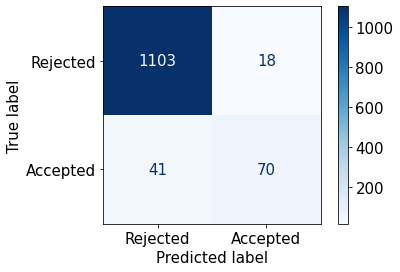

In [175]:
plot_confusion_matrix(logreg, X_test, y_test, cmap=plt.cm.Blues, display_labels = ['Rejected', 'Accepted'])
plt.show()

To interpret the confusion Matrix above, Logistic regression was our worst model.  It had the most number of false positives whichis what we are trying to avoid.

It is important to note however, that the top right corner is people who we thought would accept the offer but rejected.  This is the number we want the lowest out of the entire confusion matrix.  Although False Negative is not ideal, we can count on the fact that these customers may learn about the promotion via general advertising.  The idea is to reach as many true positives (or people who will accept the loan offer) and the avoid false positives (people we thought would accept but end up rejecting) as this will be a waste of time and resources.   

#### Accuracy, Recall, Precision, F1

Below is the code to get Accuracy, Recall Precision, and F1 Score.  Beyond this I used the built in classification report function.

Accuracy is the number of correctly predicted data points out of all the data points. ... Often, accuracy is used along with precision and recall, which are other metrics that use various ratios of true/false positives/negatives.

Precision talks about how precise/accurate your model is out of those predicted positive, how many of them are actual positive.

Recall actually calculates how many of the Actual Positives our model captures through labeling it as Positive (True Positive).

F1 is a function of Precision and Recall.  F1 Score might be a better measure to use if we need to seek a balance between Precision and Recall AND there is an uneven class distribution (large number of Actual Negatives).

Accuracy is used when the True Positives and True negatives are more important while F1-score is used when the False Negatives and False Positives are crucial. ... In most real-life classification problems, imbalanced class distribution exists and thus F1-score is a better metric to evaluate our model on.

In [176]:
# Accuracy
from sklearn.metrics import accuracy_score
Accuracy = accuracy_score(y_test, y_hat_test)
# Recall
from sklearn.metrics import recall_score
Recall = recall_score(y_test, y_hat_test, average=None)
# Precision
from sklearn.metrics import precision_score
Precision = precision_score(y_test, y_hat_test, average=None)

In [177]:
print(Accuracy)
print(Recall)
print(Precision)

0.9521103896103896
[0.98394291 0.63063063]
[0.96416084 0.79545455]


In [178]:
from sklearn.metrics import f1_score
f1_score(y_test, y_hat_test)

0.7035175879396985

### Decision Tree

Trees answer sequential questions which send us down a certain route of the tree given the answer. The model behaves with “if this than that” conditions ultimately yielding a specific result.

In [179]:
#import sklearn related to DTC
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

Entropy measures the expected (i.e., average) amount of information conveyed by identifying the outcome of a random trial. This implies that casting a die has higher entropy than tossing a coin because each outcome of a die toss has smaller probability (about ) than each outcome of a coin toss ( ).

In [180]:
#create a decision tree and fit it to the training data
df_dt = DecisionTreeClassifier(criterion = 'entropy', random_state = 1)
df_dt = df_dt.fit(X_train, y_train)

In [181]:
#This y predicted variable is vital to all of our results.  
#I am going to generate a different Y_pred for each model and then compare each model.
y_pred_dt = df_dt.predict(X_test)

[Text(356.25474683544303, 393.1392857142857, 'Income <= 0.58\nentropy = 0.447\nsamples = 3694\nvalue = [3350, 344]\nclass = Rejected'),
 Text(169.51898734177215, 364.0178571428571, 'CCAvg <= 0.621\nentropy = 0.08\nsamples = 2813\nvalue = [2785, 28]\nclass = Rejected'),
 Text(148.32911392405063, 334.89642857142854, 'entropy = 0.0\nsamples = 2639\nvalue = [2639, 0]\nclass = Rejected'),
 Text(190.70886075949366, 334.89642857142854, 'CD_Account <= 1.887\nentropy = 0.637\nsamples = 174\nvalue = [146, 28]\nclass = Rejected'),
 Text(148.32911392405063, 305.775, 'CCAvg <= 1.193\nentropy = 0.505\nsamples = 161\nvalue = [143, 18]\nclass = Rejected'),
 Text(127.13924050632912, 276.6535714285714, 'Income <= 0.199\nentropy = 0.646\nsamples = 109\nvalue = [91, 18]\nclass = Rejected'),
 Text(84.75949367088607, 247.53214285714284, 'Age <= -0.776\nentropy = 0.27\nsamples = 65\nvalue = [62, 3]\nclass = Rejected'),
 Text(63.56962025316456, 218.41071428571428, 'Family <= 0.975\nentropy = 0.918\nsamples = 

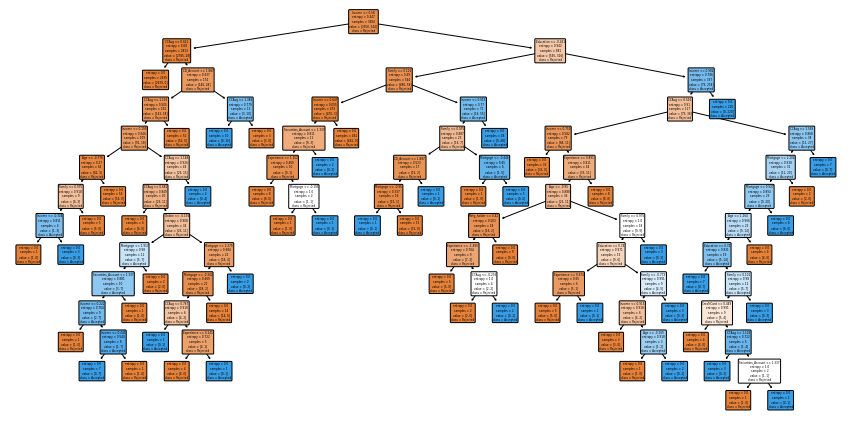

In [182]:
#Honestly, visually, this is not a bad tree.

plt.figure(figsize = (15, 7.5))
plot_tree(df_dt, filled = True, rounded = True, class_names = ['Rejected', 'Accepted'], feature_names = X.columns)

#### ROC and AUC

AUC - ROC curve is a performance measurement for the classification problems at various threshold settings. ROC is a probability curve and AUC represents the degree or measure of separability.  The Higher the AUC, the better the model is at distinguishing between who will accept or not accept the personal loan offer.

In [183]:
from sklearn.metrics import roc_curve, auc

What is Specificity v. Sensitivity

Sensitivity measures how often a test correctly generates a positive result for people who have the condition that's being tested for (also known as the “TRUE POSITIVE” rate). ... A high-specificity test will correctly rule out almost everyone who doesn't have the disease and won't generate many false-positive results.

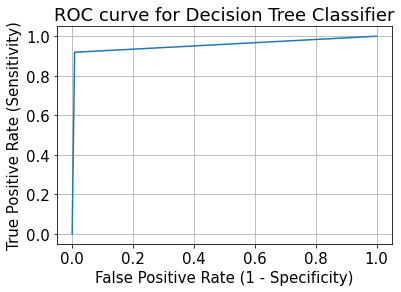

Area Under the Curve: 
 -----------------------------------
0.9554451864888974


In [184]:
# Check the AUC of predictions
fpr, tpr, thresholds = roc_curve(y_test, y_pred_dt)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr)
plt.title('ROC curve for Decision Tree Classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)
plt.show()
print('Area Under the Curve: \n -----------------------------------')
print(roc_auc)

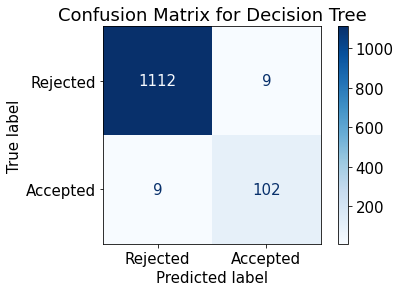

In [185]:
plot_confusion_matrix(df_dt, X_test, y_test, cmap=plt.cm.Blues, display_labels = ['Rejected', 'Accepted'] )
plt.title('Confusion Matrix for Decision Tree')
plt.show()

In [214]:
print(accuracy_score(y_test, y_pred_dt))
print(f1_score(y_test, y_pred_dt))

0.9853896103896104
0.918918918918919


In [186]:
from sklearn.metrics import classification_report

In [187]:
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      1121
         1.0       0.92      0.92      0.92       111

    accuracy                           0.99      1232
   macro avg       0.96      0.96      0.96      1232
weighted avg       0.99      0.99      0.99      1232



### KNN  K-Nearest Neighbors:

KNN works by finding the distances between a query and all the examples in the data, selecting the specified number examples (K) closest to the query, then votes for the most frequent label (in the case of classification) or averages the labels (in the case of regression).

In [188]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

In [189]:
knn_dt = knn.fit(X_train, y_train)

In [190]:
y_pred_knn = knn.predict(X_test)

In [191]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98      1121
         1.0       0.96      0.58      0.72       111

    accuracy                           0.96      1232
   macro avg       0.96      0.79      0.85      1232
weighted avg       0.96      0.96      0.95      1232



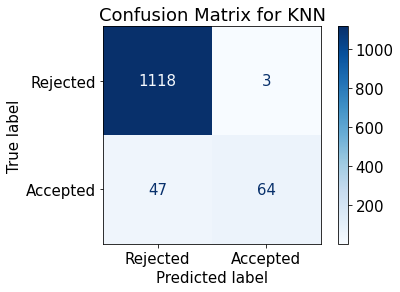

In [192]:
#confusion matrix
plot_confusion_matrix(knn_dt, X_test, y_test, cmap=plt.cm.Blues, display_labels = ['Rejected', 'Accepted'] )
plt.title('Confusion Matrix for KNN')
plt.show()

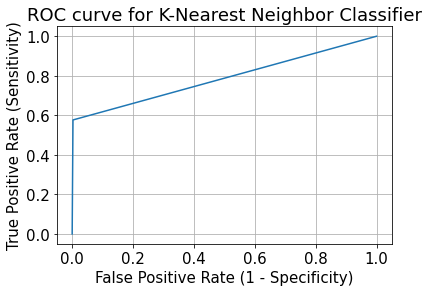

Area Under the Curve: 
 -----------------------------------
0.7869501972981009


In [193]:
# Check the AUC of predictions
fpr, tpr, thresholds = roc_curve(y_test, y_pred_knn)
roc_auc = auc(fpr, tpr)
roc_auc
plt.plot(fpr, tpr)
plt.title('ROC curve for K-Nearest Neighbor Classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)
plt.show()
print('Area Under the Curve: \n -----------------------------------')
print(roc_auc)

In [215]:
print(accuracy_score(y_test, y_pred_knn))
print(f1_score(y_test, y_pred_knn))

0.9594155844155844
0.7191011235955056


### Random Forest

From an article on Towards Data Science:

One way Random Forests reduce variance is by training on different samples of the data. A second way is by using a random subset of features. This means if we have 30 features, random forests will only use a certain number of those features in each model, say five. Unfortunately, we have omitted 25 features that could be useful. But as stated, a random forest is a collection of decision trees. Thus, in each tree we can utilize five random features. If we use many trees in our forest, eventually many or all of our features will have been included. This inclusion of many features will help limit our error due to bias and error due to variance. If features weren’t chosen randomly, base trees in our forest could become highly correlated. This is because a few features could be particularly predictive and thus, the same features would be chosen in many of the base trees. If many of these trees included the same features we would not be combating error due to variance.
With that said, random forests are a strong modeling technique and much more robust than a single decision tree. They aggregate many decision trees to limit overfitting as well as error due to bias and therefore yield useful results.

In [194]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100)
rf_clf = clf.fit(X_train,y_train)

y_pred_rf = clf.predict(X_test)

In [195]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      1121
         1.0       0.98      0.87      0.92       111

    accuracy                           0.99      1232
   macro avg       0.98      0.94      0.96      1232
weighted avg       0.99      0.99      0.99      1232



Text(0.5, 1.0, 'Confusion Matrix for Random Forest')

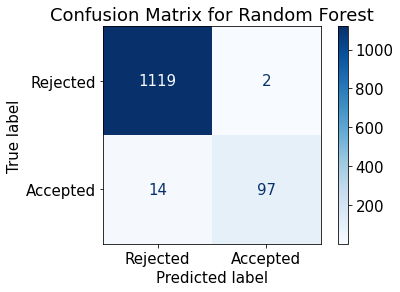

In [196]:
plot_confusion_matrix(rf_clf, X_test, y_test,  cmap=plt.cm.Blues, display_labels = ['Rejected', 'Accepted'] )
plt.title('Confusion Matrix for Random Forest')

[Text(427.6173214285714, 524.1857142857143, 'Income <= 0.647\ngini = 0.18\nsamples = 2350\nvalue = [3324, 370]\nclass = Rejected'),
 Text(214.92964285714285, 485.3571428571429, 'Age <= 1.134\ngini = 0.031\nsamples = 1825\nvalue = [2786, 45]\nclass = Rejected'),
 Text(147.6707142857143, 446.52857142857147, 'Securities_Account <= 1.337\ngini = 0.023\nsamples = 1551\nvalue = [2360, 28]\nclass = Rejected'),
 Text(99.24428571428571, 407.70000000000005, 'CD_Account <= 1.887\ngini = 0.019\nsamples = 1384\nvalue = [2095, 20]\nclass = Rejected'),
 Text(69.35142857142857, 368.8714285714286, 'Income <= 0.177\ngini = 0.016\nsamples = 1362\nvalue = [2064, 17]\nclass = Rejected'),
 Text(38.26285714285714, 330.0428571428572, 'Education <= 0.74\ngini = 0.004\nsamples = 1104\nvalue = [1675, 3]\nclass = Rejected'),
 Text(28.697142857142858, 291.2142857142857, 'CCAvg <= 0.606\ngini = 0.006\nsamples = 720\nvalue = [1082, 3]\nclass = Rejected'),
 Text(19.13142857142857, 252.3857142857143, 'gini = 0.0\nsamp

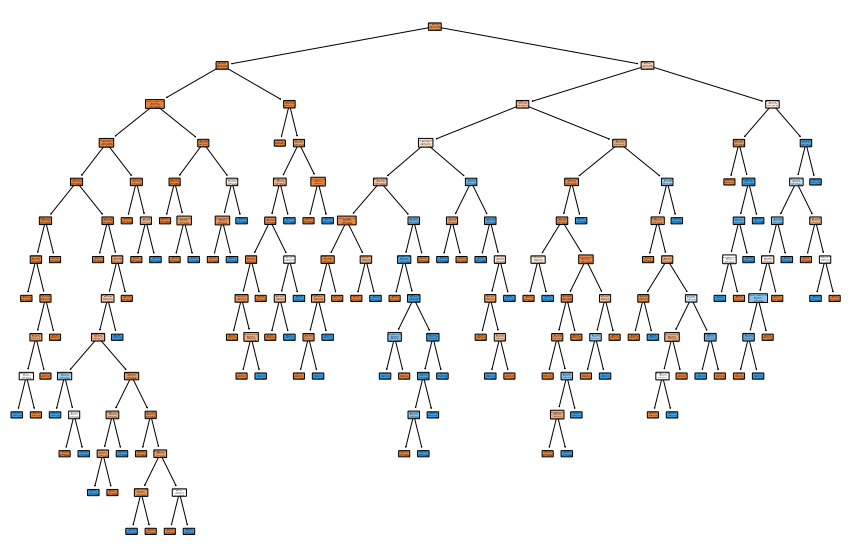

In [197]:
## Initial overfitting in this plot
from sklearn import tree
plt.figure(figsize = (15,10))
tree.plot_tree(rf_clf.estimators_[2], rounded = True, filled = True, class_names = ['Rejected', 'Accepted'], feature_names = X.columns)

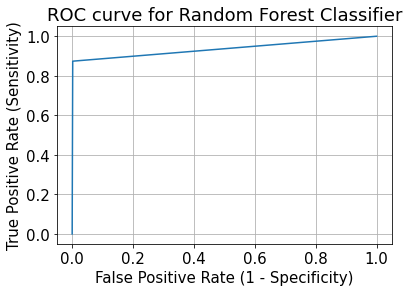

Area Under the Curve: 
 -----------------------------------
0.936044876276812


In [198]:
# Check the AUC of predictions
fpr, tpr, thresholds = roc_curve(y_test, y_pred_rf)
roc_auc = auc(fpr, tpr)
roc_auc
plt.plot(fpr, tpr)
plt.title('ROC curve for Random Forest Classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)
plt.show()
print('Area Under the Curve: \n -----------------------------------')
print(roc_auc)

In [216]:
print(accuracy_score(y_test, y_pred_rf))
print(f1_score(y_test, y_pred_rf))

0.987012987012987
0.9238095238095239


### Support Vector Machine

A support vector machine takes data points and outputs the hyperplane (which in two dimensions it's simply a line) that best separates the features. This line is the decision boundary: anything that falls to one side of it we will classify as say, 'blue', and anything that falls to the other as 'red'.

In [199]:
from sklearn.svm import SVC
svcls = SVC(kernel='rbf', C=1, gamma = 2**-5)
svc_df = svcls.fit(X_train, y_train)

In [200]:
y_pred_svc = svcls.predict(X_test)

In [201]:
print(classification_report(y_test, y_pred_svc))

              precision    recall  f1-score   support

         0.0       0.97      1.00      0.99      1121
         1.0       0.98      0.71      0.82       111

    accuracy                           0.97      1232
   macro avg       0.97      0.85      0.90      1232
weighted avg       0.97      0.97      0.97      1232



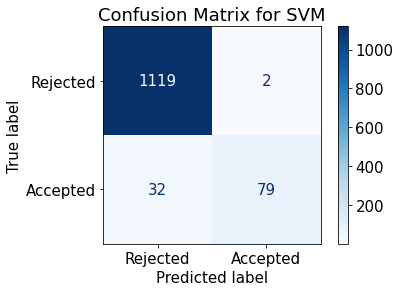

In [222]:
#confusion matrix
plot_confusion_matrix(svc_df, X_test, y_test, cmap=plt.cm.Blues, display_labels = ['Rejected', 'Accepted'])
plt.title('Confusion Matrix for SVM')
plt.show()

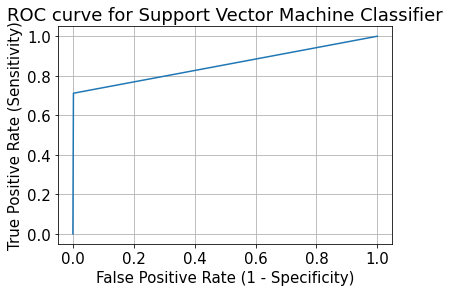

Area Under the Curve: 
 -----------------------------------
0.8549637951957308


In [203]:
# Check the AUC of predictions
fpr, tpr, thresholds = roc_curve(y_test, y_pred_svc)
roc_auc = auc(fpr, tpr)
roc_auc
plt.plot(fpr, tpr)
plt.title('ROC curve for Support Vector Machine Classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)
plt.show()
print('Area Under the Curve: \n -----------------------------------')
print(roc_auc)

In [217]:
print(accuracy_score(y_test, y_pred_svc))
print(f1_score(y_test, y_pred_svc))

0.9724025974025974
0.8229166666666666


### XG Boost

In [204]:
import xgboost as xgb
from xgboost import XGBClassifier

In [205]:
clf_xgb = xgb.XGBClassifier(objective = 'binary:logistic')
xgb_df = clf_xgb.fit(X_train, y_train, verbose = True)

In [206]:
y_pred_xgb = clf_xgb.predict(X_test)

In [207]:
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      1121
         1.0       0.96      0.89      0.93       111

    accuracy                           0.99      1232
   macro avg       0.98      0.94      0.96      1232
weighted avg       0.99      0.99      0.99      1232



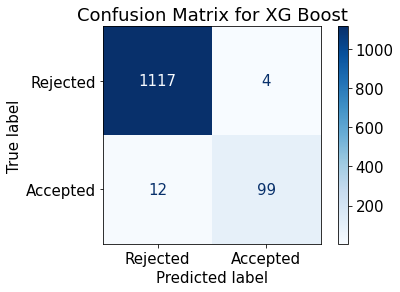

In [208]:
plot_confusion_matrix(clf_xgb, X_test, y_test, cmap=plt.cm.Blues, display_labels = ['Rejected', 'Accepted']) 
plt.title('Confusion Matrix for XG Boost')
plt.show()

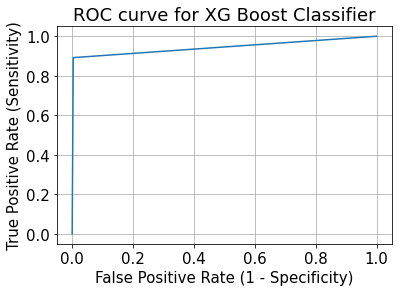

Area Under the Curve: 
 -----------------------------------
0.9441618246256961


In [209]:
# Check the AUC of predictions
fpr, tpr, thresholds = roc_curve(y_test, y_pred_xgb)
roc_auc = auc(fpr, tpr)
roc_auc
plt.plot(fpr, tpr)
plt.title('ROC curve for XG Boost Classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)
plt.show()
print('Area Under the Curve: \n -----------------------------------')
print(roc_auc)

In [218]:
print(accuracy_score(y_test, y_pred_xgb))
print(f1_score(y_test, y_pred_xgb))

0.987012987012987
0.9252336448598131


### Overall results

We are going to go with Random Forest.  XG Boost Performs a little better as far as balancing False Positives and False Negatives.  In the case of this marketing campagin however, we want our false positives to be as low as possible.  This is because any potential client will have money and resources invested in them.  False positives are a waste of time and resources.  False Negatives are not ideal, but there is a likelihood they will discover promotional offers via internet, signs, word of mouth, ext.  Since the Random Forest consistantly produces the lowest number of False Positives it is the winner.

In [224]:
data = [['Decision Tree',.9554, .9854, .9189], 
        ['K-Nearest Neighbor',.7869,.9594,.7191], 
        ['Random Forest',.936,.987,.9238], 
        ['Support Vector Machine',.8594,.9724,.8229], 
        ['XG Boost',.9441, .987, .9252]] 
  

df_results = pd.DataFrame(data, columns = ['Model Type', 'AUC', 'Accuracy', 'F1 Score']) 
  

df_results 

,Model Type,AUC,Accuracy,F1 Score
0,Decision Tree,0.9554,0.9854,0.9189
1,K-Nearest Neighbor,0.7869,0.9594,0.7191
2,Random Forest,0.9360,0.9870,0.9238
3,Support Vector Machine,0.8594,0.9724,0.8229
4,XG Boost,0.9441,0.9870,0.9252


In [211]:
y_preds = [y_pred_rf, y_pred_dt, y_pred_xgb, y_pred_svc, y_pred_knn]

In [241]:
rows = [(accuracy_score(y_test, pred),f1_score(y_test, pred), auc(y_test,pred)) for pred in y_preds(3)]
df_1 = pd.DataFrame(rows, columns=["RF", "DT", "XGB", "SVC", "KNN"])

TypeError: 'list' object is not callable

In [ ]:
columns = 

## Dealing with Class Imbalance:

### Check class imbalance

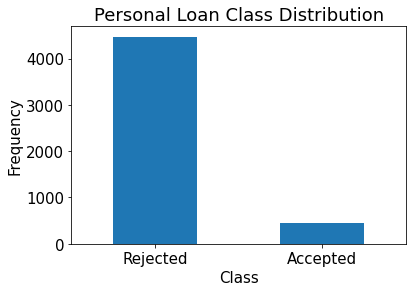

In [225]:
count_classes = pd.value_counts(df['Personal_Loan'], sort = True)
count_classes.plot(kind = 'bar', rot=0)

plt.title("Personal Loan Class Distribution")
plt.xticks((0,1), ('Rejected', 'Accepted'))
plt.xlabel("Class")
plt.ylabel("Frequency")

plt.show()

As we can see, the one huge problem with our data set is that our dependant variable is grossly imbalanced.  
Although only 9% of the people approved for this loan accepted it is still data worth digging into.
This study was done on a local level but if this were to be expanded to a national or international level you would be talking about tens of thousands of people or more that would be paying interest to the bank.
We are going to handle that with SMOTE.

In [227]:
accepted = df[df['Personal_Loan']==1]

rejected = df[df['Personal_Loan']==0]

In [228]:
print(accepted.shape, rejected.shape)

(455, 13) (4471, 13)


#### SMOTE

SMOTE stands for Synthetic Minority Oversampling Technique. This is a statistical technique for increasing the number of cases in your dataset in a balanced way. ... SMOTE takes the entire dataset as an input, but it increases the percentage of only the minority cases.

In [229]:
from imblearn.over_sampling import SMOTE 

sm = SMOTE(random_state=42)

X_sm, y_sm = sm.fit_resample(X, y)


##finding shortcuts for printing clean data results
print(f'''Shape of X before SMOTE: {X.shape}
Shape of X after SMOTE: {X_sm.shape}''')

print('\nBalance of positive and negative classes (Percentage):')
y_sm.value_counts(normalize=True) * 100


Shape of X before SMOTE: (4926, 12)
Shape of X after SMOTE: (8942, 12)

Balance of positive and negative classes (Percentage):


1.0    50.0
0.0    50.0
Name: Personal_Loan, dtype: float64

After refitting the data I created a whole new training and testing set with new confusion matrix as well. 

Accuracy = 0.99
Recall = 0.99



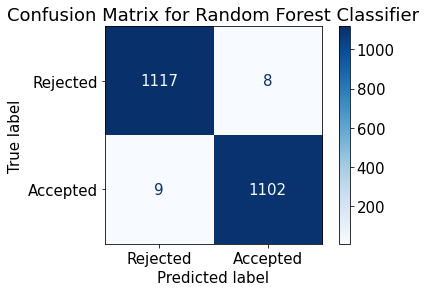

In [230]:
X_train, X_test, y_train, y_test = train_test_split(
    X_sm, y_sm, test_size=0.25, random_state=42)

model = RandomForestClassifier(random_state=42)
rf_smt = model.fit(X_train, y_train)
y_pred = model.predict(X_test)


### Cool new piece of code:  
#The f' opens up a bracket
#the\n' closes it and adds a return at the end
#the .2f is a place holder so that all that shows up is the .99
#{}  not quite sure technical terms for what is happening here.. come back to this one..

print(f'Accuracy = {accuracy_score(y_test, y_pred):.2f}\nRecall = {recall_score(y_test, y_pred):.2f}\n')

plot_confusion_matrix(rf_smt, X_test, y_test, cmap=plt.cm.Blues, display_labels = ['Rejected', 'Accepted'])
plt.title('Confusion Matrix for Random Forest Classifier')
plt.show()

SO looking at the confusion matrix above, we have a much more balance approach, with extremely low False Positives and False Negitives.  However we have abundantly more True Positives to gauge our decisions from which is AWESOME!

[Text(367.5157470703125, 527.6117647058824, 'Income <= 95.08\ngini = 0.5\nsamples = 4244\nvalue = [3339, 3367]\nclass = Approved'),
 Text(112.798828125, 495.63529411764705, 'CD_Account <= 0.0\ngini = 0.116\nsamples = 1862\nvalue = [2766, 182]\nclass = Denied'),
 Text(68.66015625, 463.6588235294118, 'CCAvg <= 2.95\ngini = 0.055\nsamples = 1739\nvalue = [2675, 78]\nclass = Denied'),
 Text(61.186941964285715, 431.6823529411765, 'gini = 0.0\nsamples = 1589\nvalue = [2511, 0]\nclass = Denied'),
 Text(76.13337053571428, 431.6823529411765, 'Education <= 1.01\ngini = 0.437\nsamples = 150\nvalue = [164, 78]\nclass = Denied'),
 Text(33.629464285714285, 399.7058823529412, 'Experience <= 2.5\ngini = 0.026\nsamples = 50\nvalue = [76, 1]\nclass = Denied'),
 Text(26.15625, 367.7294117647059, 'Age <= 26.5\ngini = 0.444\nsamples = 2\nvalue = [2, 1]\nclass = Denied'),
 Text(18.683035714285715, 335.7529411764706, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = Approved'),
 Text(33.629464285714285, 335.

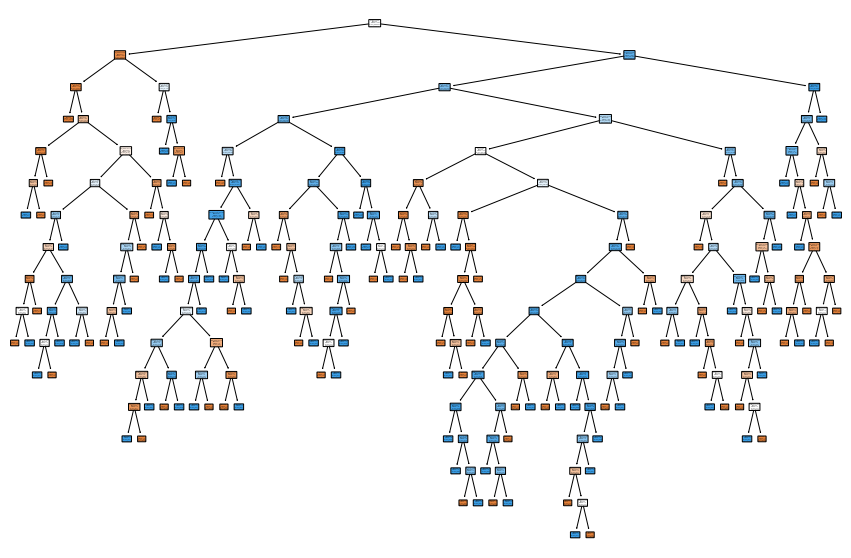

In [231]:
plt.figure(figsize = (15,10))
tree.plot_tree(rf_smt.estimators_[2], rounded = True, filled = True, class_names = ['Denied', 'Approved'], feature_names = X.columns)

And Indeed, our Random Forest Model is much less overfit.

## Classification Report

In [233]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      1125
         1.0       0.99      0.99      0.99      1111

    accuracy                           0.99      2236
   macro avg       0.99      0.99      0.99      2236
weighted avg       0.99      0.99      0.99      2236



### Feature Importances

 Feature importance refers to a class of techniques for assigning scores to input features to a predictive model that indicates the relative importance of each feature when making a prediction.

In [237]:
importances = model.feature_importances_


In [238]:
from matplotlib import cm

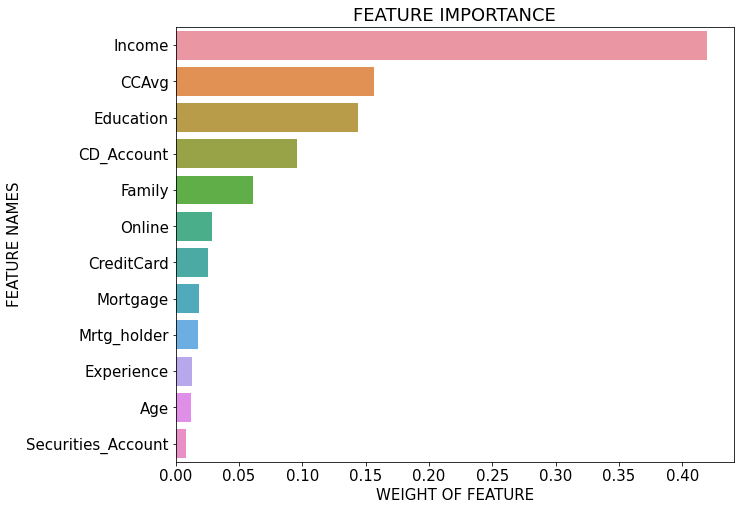

In [239]:
#Create arrays from feature importance and feature names
feature_importance = np.array(importances)
feature_names = np.array(X.columns)

#Create a DataFrame using a Dictionary
data={'feature_names':feature_names,'feature_importance':feature_importance}
fi_df = pd.DataFrame(data)

#Sort the DataFrame in order decreasing feature importance
fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

#Define size of bar plot
plt.figure(figsize=(10,8))
#Plot Searborn bar chart
sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
#Add chart labels
plt.title('FEATURE IMPORTANCE')
plt.xlabel('WEIGHT OF FEATURE')
plt.ylabel('FEATURE NAMES')

plt.show()

## Moving Forward:

Based on these results I think it is best that a marketing campagin is created around recent college graduates, post graduate students, people with lots of credit card debt, ext.

After looking up where a lot of the zip codes are, Berkeley CA had a high concentration.  There are over 20 collegate institutions in Berkeley CA.  Therefore our data is geographically biased.

This model can be expanded to a national or world wide market.  I would suggest gathering identical data from all over the country so that we can explore if there are regional trends that change.  For example maybe there are certain parts of the country that Morgage holders are the most likely to accept a personal loan for home renovations.  


